<a href="https://colab.research.google.com/github/MuhammadNaseem786/MuhammadNaseem/blob/main/DL_Sajjid_Class_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df =pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# prompt: model.add(Dense(8,activation='Relu'))

model = Sequential()
model.add(Dense(8, activation='relu'))

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11)) # atleast no of colums equal to your data colums
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid')) # for binary class exited yes ya no thats why one if the regression its still yes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,verbose=1,validation_split=0.2) # verbos its a display method

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4236 - val_accuracy: 0.8169 - val_loss: 0.4320
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8165 - loss: 0.4159 - val_accuracy: 0.8125 - val_loss: 0.4309
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.4344 - val_accuracy: 0.8194 - val_loss: 0.4293
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.4179 - val_accuracy: 0.8219 - val_loss: 0.4277
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8174 - loss: 0.4207 - val_accuracy: 0.8175 - val_loss: 0.4254
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.4225 - val_accuracy: 0.8206 - val_loss: 0.4231
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.4085 - val_accuracy: 0.8269 - val_loss: 0.4206
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 0.4190 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-2.84684479e-01, -1.29466690e-03,  1.40743807e-01,
         -1.15883730e-01, -3.68844420e-02,  5.13992310e-01,
          3.71322989e-01,  1.93262115e-01,  2.93071598e-01,
         -1.79962456e-01, -1.29639834e-01],
        [ 1.69700277e+00,  1.40800464e+00, -8.62316132e-01,
          1.32079470e+00, -1.34078515e+00, -1.27006257e+00,
         -1.39178479e+00,  2.45586544e-01, -2.51097232e-03,
          1.32039964e-01,  9.90227282e-01],
        [-8.83411150e-04, -3.42212021e-01,  1.08128332e-03,
         -1.20058116e-02, -1.48522064e-01, -1.15755320e-01,
          2.80697495e-01,  3.95858705e-01,  3.62362027e-01,
         -3.08976591e-01, -8.14578403e-03],
        [ 4.31703210e-01,  3.75742644e-01, -7.08013713e-01,
         -7.62063801e-01, -1.06869943e-01, -1.82247251e-01,
         -8.80400017e-02, -1.32429302e+00,  2.21195608e-01,
         -2.94512659e-01,  5.37535727e-01],
        [ 5.17941415e-01,  7.49360323e-01,  6.85494006e-01,
          7.78098881e-01, -6.31795526e-01, -

In [ ]:
model.layers[1].get_weights()

[array([[ 0.6147093 , -1.0673562 ,  0.6721432 , -0.8951393 , -0.83012426,
         -0.7823497 , -0.5805668 ,  0.33392668],
        [ 0.25502622, -0.2862554 ,  0.9619968 , -1.0088159 , -0.8442975 ,
         -0.63280445, -0.97807413,  0.88897777],
        [ 0.10323571, -0.81308126,  0.70187396, -0.30929875,  0.31978023,
          0.15969968, -0.30411223,  0.13306087],
        [ 1.3859963 , -1.0703444 ,  0.7095694 , -0.73649865, -1.2658701 ,
         -1.2375207 , -0.62530005,  0.65522873],
        [-0.52698076,  0.73376256, -0.820048  ,  0.6330199 ,  0.9542849 ,
          0.56680363, -0.71844316,  0.8601915 ],
        [-0.42028114,  0.5364563 , -0.21219549,  0.62835073,  0.23506355,
          0.5005459 ,  0.24342352,  0.95111215],
        [ 1.031387  , -0.70493084,  0.8878085 , -0.9467274 ,  0.3562738 ,
          0.01015891, -0.5685557 ,  0.637187  ],
        [-0.4001164 ,  0.19394904, -1.020841  ,  0.41008547,  0.23975766,
          0.6316045 ,  0.7515739 , -0.93470144],
        [-0.9774

In [ ]:
model.layers[2].get_weights()

[array([[ 2.2066388 , -2.3206418 , -1.1919658 , -1.8883405 ],
        [-1.656914  ,  0.45624918,  1.1064085 ,  0.5967243 ],
        [ 1.4638741 , -1.7991679 , -2.1584282 , -2.3947558 ],
        [-0.85930735,  1.8105037 ,  1.5651195 ,  0.79547226],
        [-1.0895358 ,  1.1051139 ,  0.6656127 ,  1.503257  ],
        [-0.26022056,  0.64014125,  0.60129696,  1.2777487 ],
        [-1.5152493 ,  1.2185371 ,  1.2846582 ,  1.0053896 ],
        [ 1.3866061 , -0.8487364 , -1.6525708 , -0.42230502]],
       dtype=float32),
 array([ 0.25835627, -0.21368305, -0.3230674 , -0.3396158 ], dtype=float32)]

In [ ]:
model.layers[3].get_weights()

[array([[ 3.3918297],
        [-2.0560324],
        [-1.6084914],
        [-1.4423997]], dtype=float32),
 array([0.42540696], dtype=float32)]

In [ ]:
ylog= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
y_pred= np.where(ylog > 0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

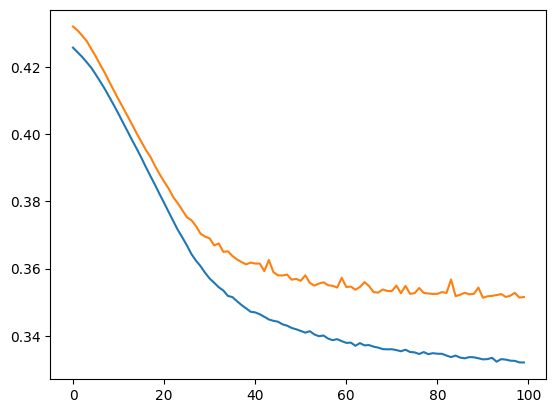

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

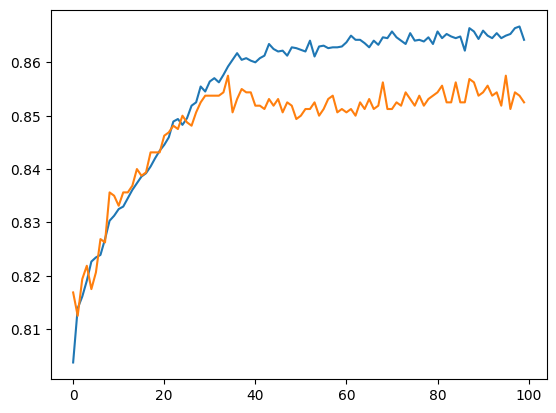

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])